# Data exploration

In [1]:
# Imports
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))
print("columns: ", list(X_train.columns))
print("train shape: ", X_train.shape, "test shape: ", X_test.shape)
train.head()

columns:  ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
train shape:  (24421, 13) test shape:  (24421, 13)


age workclass  fnlwgt      education  education-num       marital-status  \
0   30         ?  147215   Some-college             10        Never-married   
1   60   Private  173960      Bachelors             13             Divorced   
2   52         ?  105428   Some-college             10   Married-civ-spouse   
3   37   Private  112497      Bachelors             13   Married-civ-spouse   
4   63   Private  137843   Some-college             10   Married-civ-spouse   

        occupation    relationship      sex  capital-gain  capital-loss  \
0                ?       Own-child   Female             0             0   
1   Prof-specialty   Not-in-family   Female             0             0   
2                ?         Husband     Male             0             0   
3            Sales         Husband     Male             0             0   
4            Sales         Husband     Male          7298             0   

   hours-per-week  native-country  exceeds50K  
0              30   United-States           0  
1              42   United-States           0  
2              12   United-States           0  
3              60   United-States           0  
4              48   United-States           1

In [3]:
## Counting number of missing values

# check for ? values and replace by nan
print("# nan values in train:", train.isna().sum().sum())
print("# nan values in test:", X_test.isna().sum().sum())
# -> no nan values

# check for " ?" values
print("# ? values")
print("##### TRAIN #####")
for col in train.columns:
    print(col, len(train[train[col] == ' ?']))
print("##### TEST #####")
for col in X_test.columns:
    print(col, len(X_test[X_test[col] == ' ?']))

# nan values in train: 0
# nan values in test: 0
# ? values
##### TRAIN #####
age 0
workclass 1392
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1399
relationship 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 410
exceeds50K 0
##### TEST #####
age 0
workclass 1407
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1410
relationship 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 447


/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# PART I: Individual feature plots

non-normalised histogram or categorical bar plot for each individual feature to better appreciate category imbalance, the percentage for each category is displayed using red dots

0    76.000164
1    23.999836
Name: exceeds50K, dtype: float64


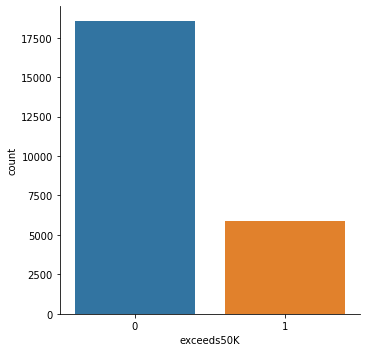

In [4]:
# class label imbalance in train

sns.catplot(x="exceeds50K", kind="count", data=train)
print(train['exceeds50K'].value_counts(normalize=True) * 100)

## 1) Fnlwgt

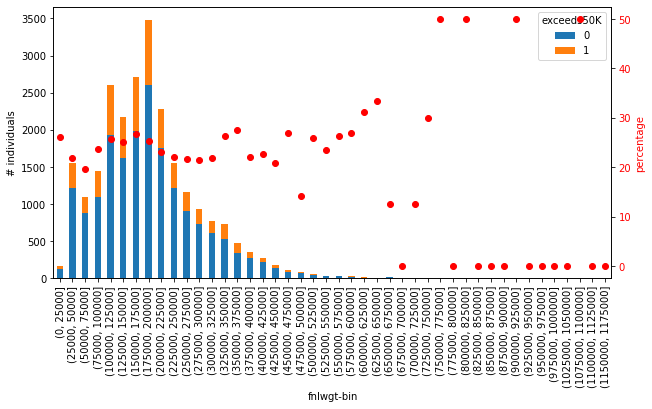

In [5]:
bins = np.arange(-25000, train["fnlwgt"].max(), 25000)
train["fnlwgt-bin"] = pd.cut(train["fnlwgt"], bins=bins, include_lowest=False)

df_plot = train.groupby(['fnlwgt-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='fnlwgt-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 2) Capital gain

######## With zero values capital gain #########
Number of adults with a nul capital gain : 92.170262%


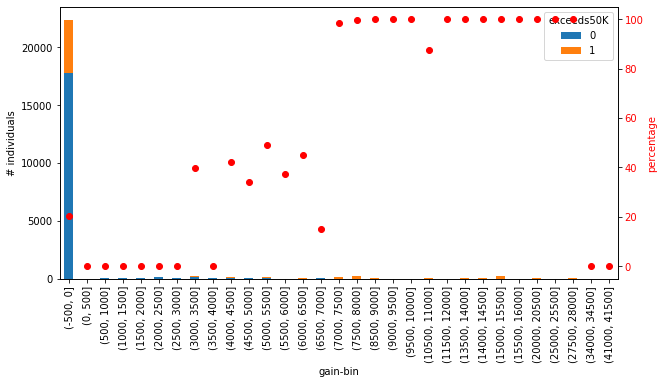

######## Only non-zero values capital gain #########


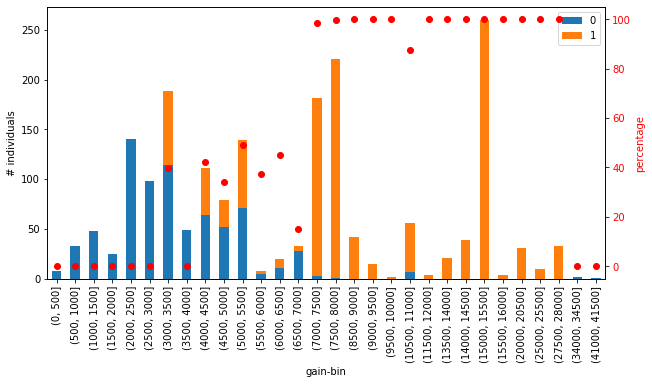

In [6]:
print("######## With zero values capital gain #########")

bins = np.arange(-500, train["capital-gain"].max(), 500)
train["gain-bin"] = pd.cut(train["capital-gain"], bins=bins, include_lowest=False)
df_plot = train.groupby(['gain-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='gain-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot.fillna(0)
df_plot = df_plot[[0, 1]]
print("Number of adults with a nul capital gain : {:2f}%".format(train['gain-bin'].value_counts(normalize=True).iloc[0] * 100))

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100
ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

print("######## Only non-zero values capital gain #########")

df_plot = train.groupby(['gain-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='gain-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot.fillna(0)
df_plot = df_plot[[0, 1]]
df_plot2 = pd.DataFrame(df_plot.values[1:, :], index=df_plot.index[1:])
df_plot2 = df_plot2[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot2.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot2 = df_plot2.fillna(0)
df_plot2 = df_plot2.div(df_plot2.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot2[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 3) Capital loss

######## With zero values capital loss #########
Number of adults with a nul capital loss : 95.367981%


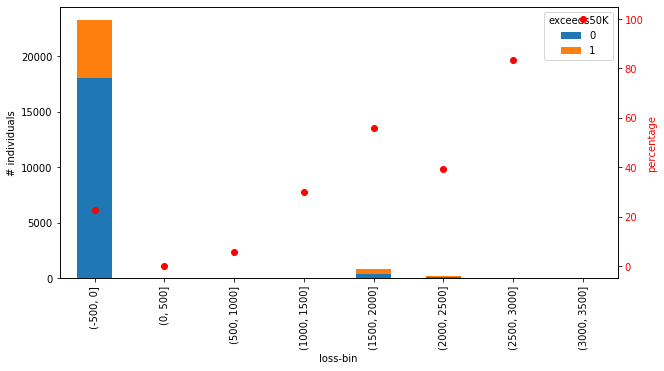

######## Only non-zero values capital loss #########


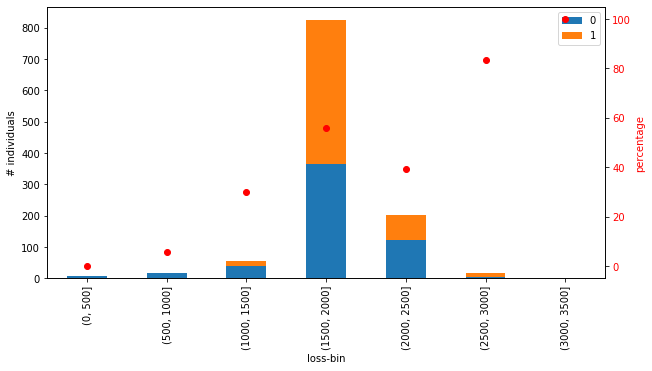

In [7]:
print("######## With zero values capital loss #########")

bins = np.arange(-500, train["capital-loss"].max(), 500)
train["loss-bin"] = pd.cut(train["capital-loss"], bins=bins, include_lowest=False)
df_plot = train.groupby(['loss-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='loss-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot.fillna(0)
df_plot = df_plot[[0, 1]]
print("Number of adults with a nul capital loss : {:2f}%".format(train['loss-bin'].value_counts(normalize=True).iloc[0] * 100))

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100
ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

print("######## Only non-zero values capital loss #########")

df_plot = train.groupby(['loss-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='loss-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot.fillna(0)
df_plot = df_plot[[0, 1]]
df_plot2 = pd.DataFrame(df_plot.values[1:, :], index=df_plot.index[1:])
df_plot2 = df_plot2[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot2.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot2 = df_plot2.fillna(0)
df_plot2 = df_plot2.div(df_plot2.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot2[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## Capital diff

Number of adults with a nul capital diff : 91.789692%


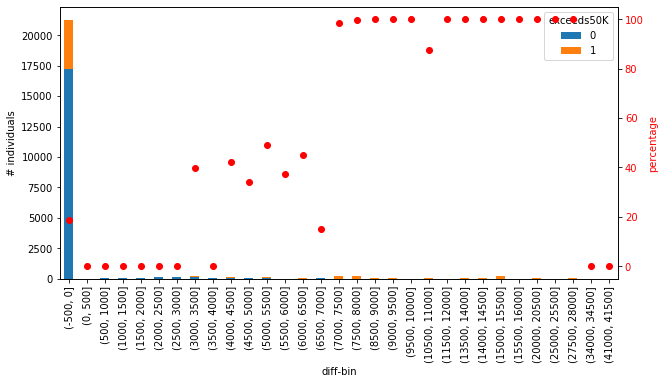

######## Only non-zero values capital diff #########


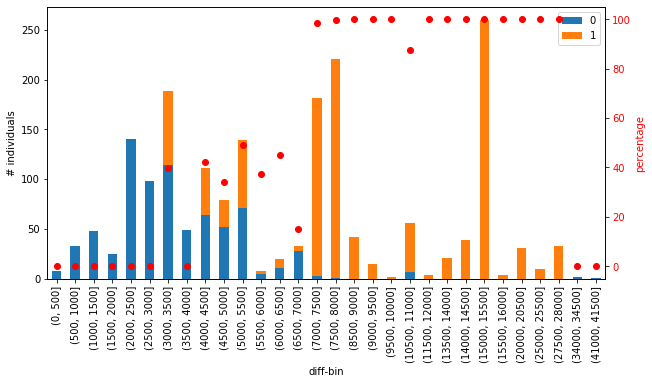

In [8]:
train["capital-diff"] = train["capital-gain"] - train["capital-loss"]

bins = np.arange(-500, train["capital-diff"].max(), 500)
train["diff-bin"] = pd.cut(train["capital-diff"], bins=bins, include_lowest=False)
df_plot = train.groupby(['diff-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='diff-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot.fillna(0)
df_plot = df_plot[[0, 1]]
print("Number of adults with a nul capital diff : {:2f}%".format(train['diff-bin'].value_counts(normalize=True).iloc[0] * 100))

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100
ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()

print("######## Only non-zero values capital diff #########")

df_plot = train.groupby(['diff-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='diff-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot.fillna(0)
df_plot = df_plot[[0, 1]]
df_plot2 = pd.DataFrame(df_plot.values[1:, :], index=df_plot.index[1:])
df_plot2 = df_plot2[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot2.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot2 = df_plot2.fillna(0)
df_plot2 = df_plot2.div(df_plot2.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot2[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 4) Education

    education-num      education  count
0               1      Preschool     43
1               2        1st-4th    126
2               3        5th-6th    244
3               4        7th-8th    488
4               5            9th    362
5               6           10th    698
6               7           11th    870
7               8           12th    333
8               9        HS-grad   7861
9              10   Some-college   5424
10             11      Assoc-voc   1040
11             12     Assoc-acdm    815
12             13      Bachelors   4047
13             14        Masters   1336
14             15    Prof-school    432
15             16      Doctorate    302


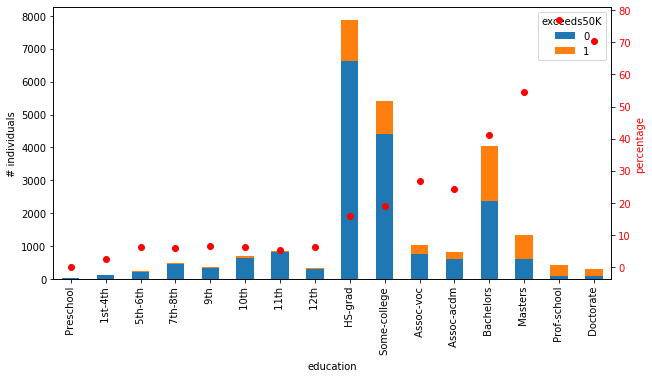

In [9]:
print(train.groupby(["education-num", "education"]).size().reset_index().rename(columns={0:'count'})) # -> education num = education encoded

list_education = list(train.groupby(["education-num", "education"]).size().reset_index().rename(columns={0:'count'})['education'].values)
df_plot = train.groupby(['education', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='education', values=0).reindex(list_education)

fig, ax = plt.subplots(figsize=(10, 5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 5) Workclass

 Private             69.051226
 Self-emp-not-inc     8.017690
 Local-gov            6.580402
 ?                    5.700012
 State-gov            4.103026
 Self-emp-inc         3.472421
 Federal-gov          3.009705
 Without-pay          0.036854
 Never-worked         0.028664
Name: workclass, dtype: float64


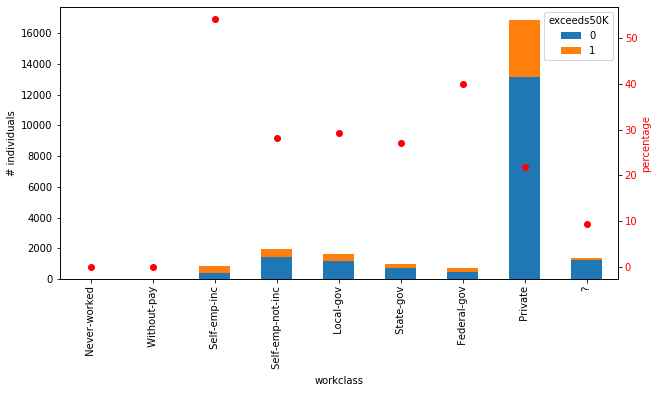

In [10]:
list_workclass = [' Never-worked', ' Without-pay', ' Self-emp-inc', ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Federal-gov', ' Private', ' ?']
df_plot = train.groupby(['workclass', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='workclass', values=0).reindex(list_workclass)

print(train["workclass"].value_counts(normalize=True) * 100)
fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.show()


## 6) Sex

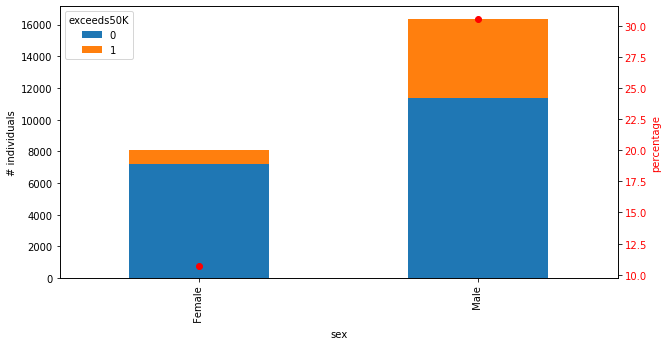

In [11]:
df_plot = train.groupby(['sex', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='sex', values=0).sort_index(ascending=False, axis=1)

fig, ax = plt.subplots(figsize=(10,5))
df_plot = df_plot[[0, 1]]
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 7) Age

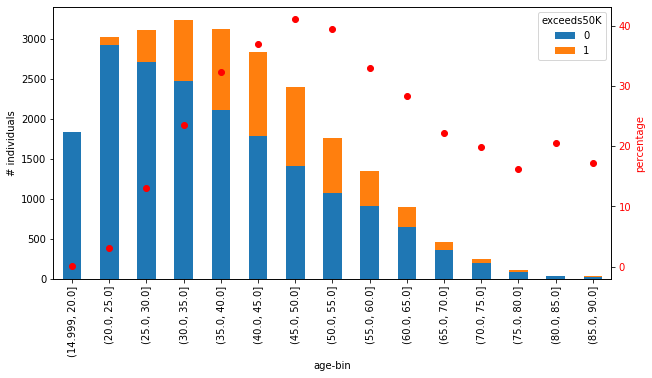

In [12]:
bins = np.arange(15, 95, 5)
train["age-bin"] = pd.cut(train["age"], bins=bins, include_lowest=True)
df_plot = train.groupby(['age-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='age-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 8) Hours per week

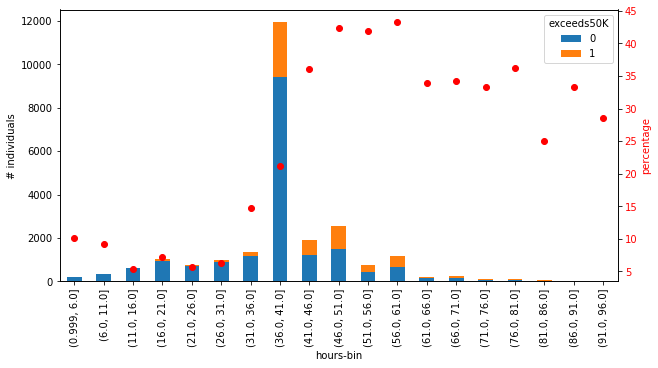

In [13]:
bins = np.arange(1, 100, 5)
train["hours-bin"] = pd.cut(train["hours-per-week"], bins=bins, include_lowest=True)
df_plot = train.groupby(['hours-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='hours-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 9) Native country

count              24421
unique                41
top        United-States
freq               21883
Name: native-country, dtype: object


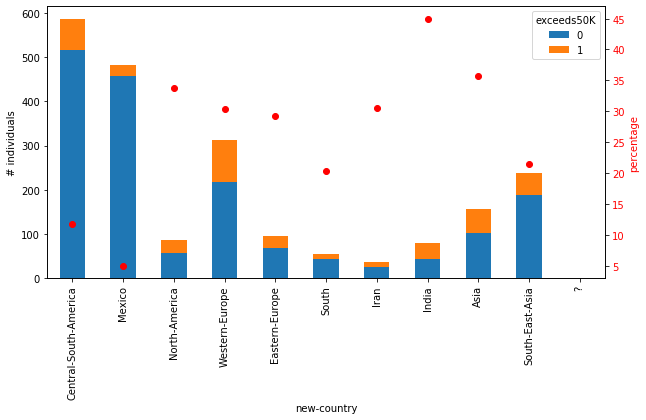

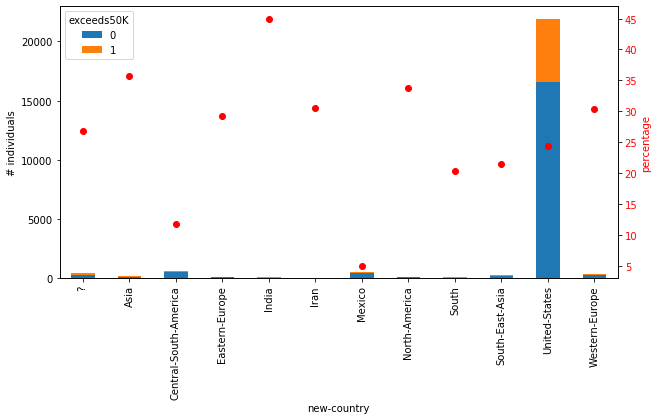

In [14]:
list_country = ["Central-South-America", "Mexico", "North-America", "Western-Europe", "Eastern-Europe", "South", "Iran", "India", "Asia", "South-East-Asia", "?"]

new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

train['new-country'] = train['native-country'].copy()

for k, v in new_countries.items():
    train['new-country'] = train['new-country'].replace(v, k)

    
df_plot = train.groupby(['new-country', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='new-country', values=0).reindex(list_country)
fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

print(train['native-country'].describe())

df_plot = train.groupby(['new-country', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='new-country', values=0)

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')
df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 10) Marital status

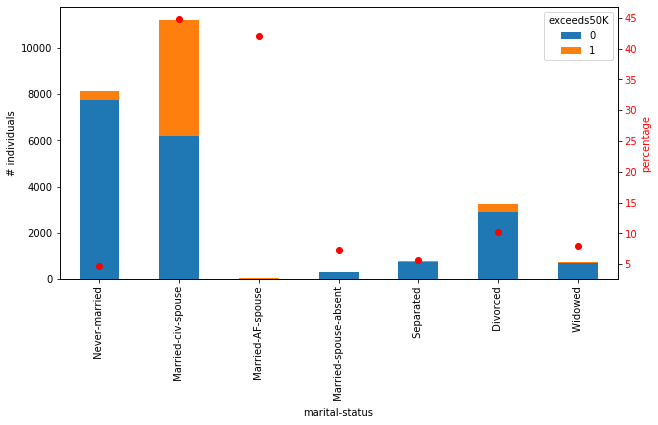

In [15]:
list_marital = [' Never-married', ' Married-civ-spouse', ' Married-AF-spouse', ' Married-spouse-absent', ' Separated', ' Divorced', ' Widowed']
df_plot = train.groupby(['marital-status', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='marital-status', values=0).reindex(list_marital)
df_plot = df_plot[[0, 1]]
fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 11) Relationship

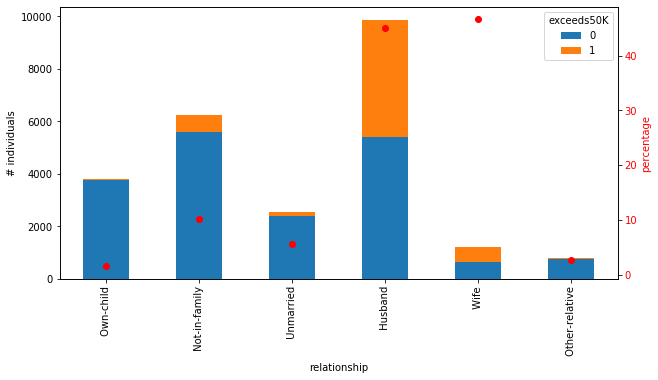

In [16]:
list_relationship = [' Own-child', ' Not-in-family', ' Unmarried', ' Husband', ' Wife', ' Other-relative']
df_plot = train.groupby(['relationship', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='relationship', values=0).reindex(list_relationship)

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

## 12) Occupation

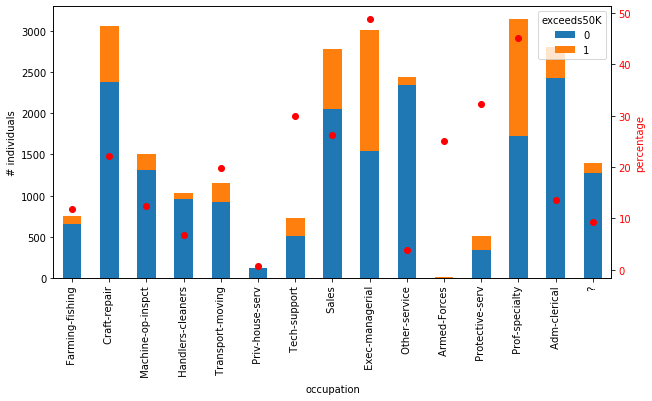

In [17]:
list_occupation = [' Farming-fishing', ' Craft-repair', ' Machine-op-inspct', ' Handlers-cleaners', ' Transport-moving', 
 ' Priv-house-serv', ' Tech-support', ' Sales', ' Exec-managerial', ' Other-service', ' Armed-Forces', ' Protective-serv' , ' Prof-specialty', ' Adm-clerical', ' ?']
df_plot = train.groupby(['occupation', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='occupation', values=0).reindex(list_occupation)

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# PART II: Train and test set distributions

The train and tests sets distributions are highly similar

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


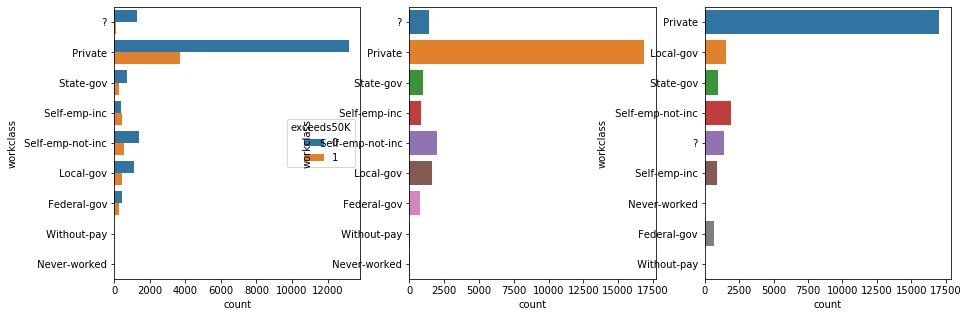

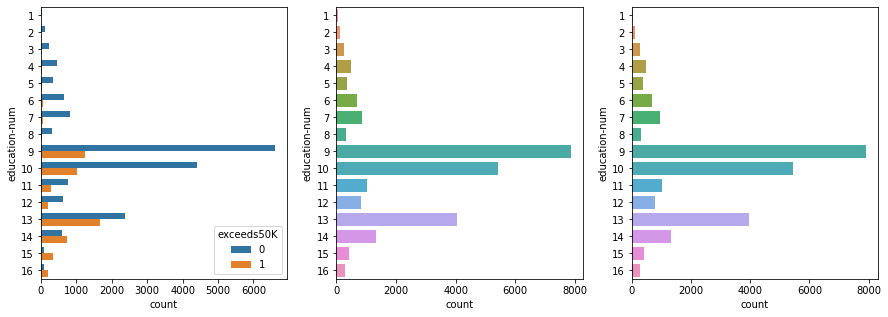

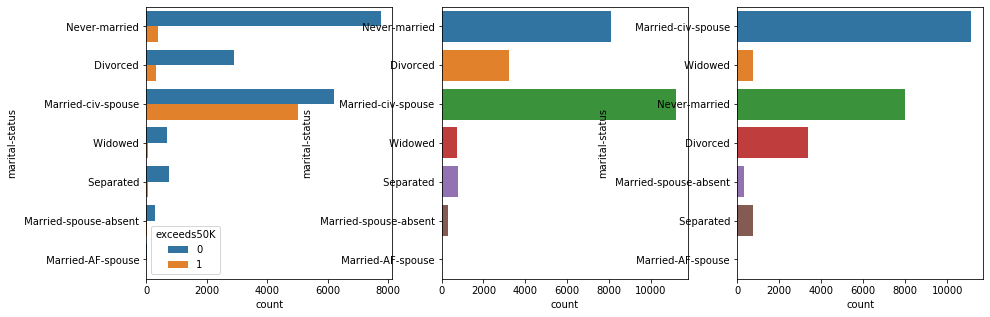

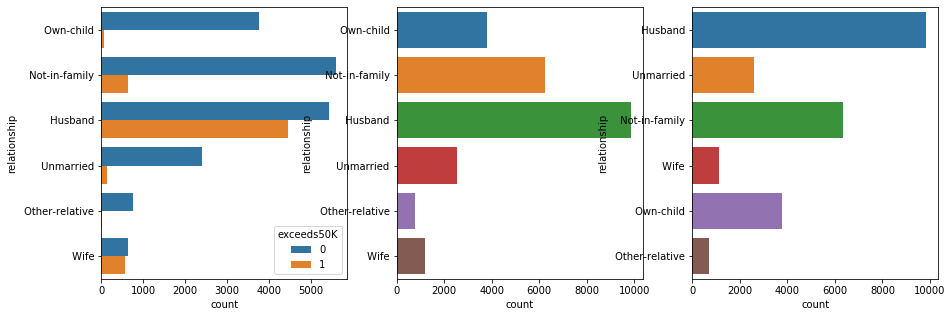

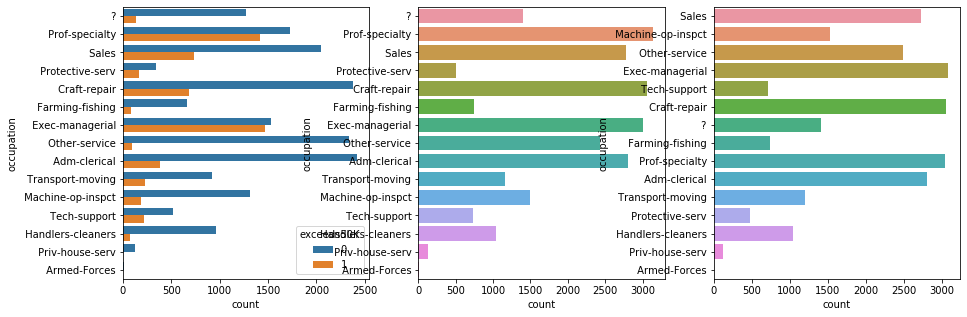

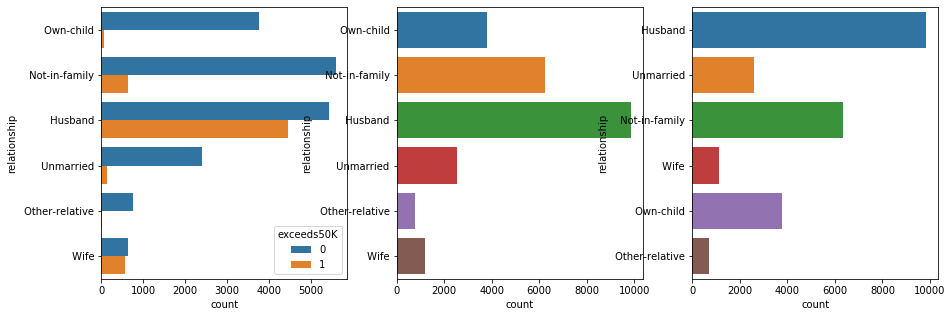

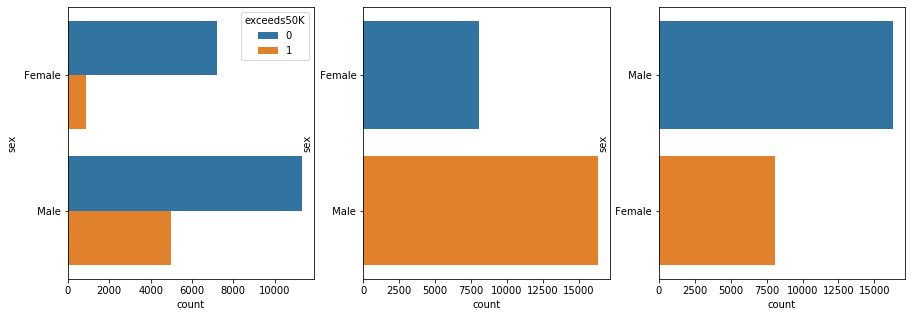

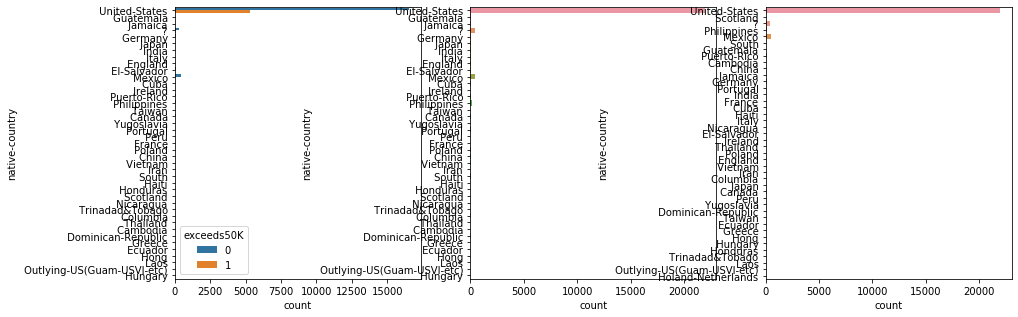

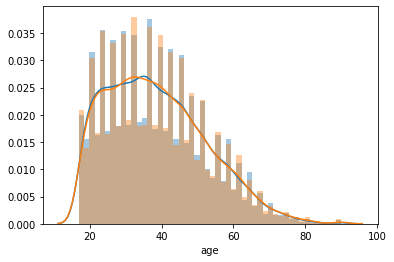

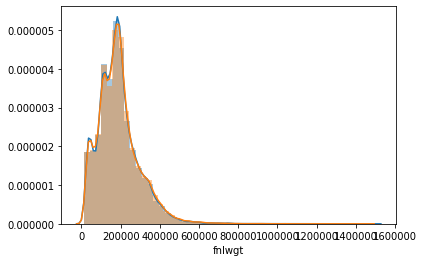

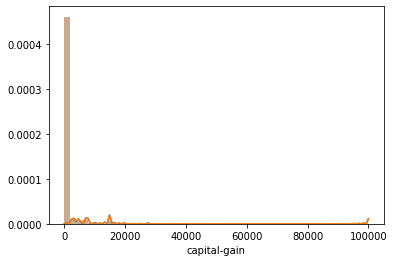

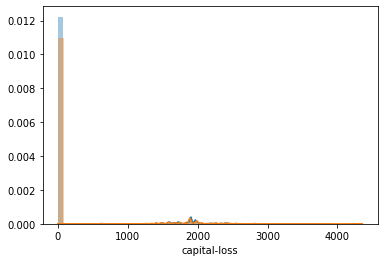

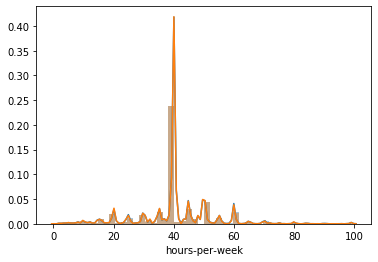

In [18]:
# display each variables category distribution in train and test


fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="workclass", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="workclass", kind="count", data=train, ax=ax[1])
sns.catplot(y="workclass", kind="count", data=X_test, ax=ax[2])
plt.close(2)
plt.close(3)
plt.close(4)


fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="education-num", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="education-num", kind="count", data=train, ax=ax[1])
sns.catplot(y="education-num", kind="count", data=X_test, ax=ax[2])
plt.close(3)
plt.close(4)
plt.close(5)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="marital-status", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="marital-status", kind="count", data=train, ax=ax[1])
sns.catplot(y="marital-status", kind="count", data=X_test, ax=ax[2])
plt.close(4)
plt.close(5)
plt.close(6)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="relationship", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="relationship", kind="count", data=train, ax=ax[1])
sns.catplot(y="relationship", kind="count", data=X_test, ax=ax[2])
plt.close(5)
plt.close(6)
plt.close(7)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="occupation", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="occupation", kind="count", data=train, ax=ax[1])
sns.catplot(y="occupation", kind="count", data=X_test, ax=ax[2])
plt.close(6)
plt.close(7)
plt.close(8)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="relationship", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="relationship", kind="count", data=train, ax=ax[1])
sns.catplot(y="relationship", kind="count", data=X_test, ax=ax[2])
plt.close(7)
plt.close(8)
plt.close(9)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="sex", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="sex", kind="count", data=train, ax=ax[1])
sns.catplot(y="sex", kind="count", data=X_test, ax=ax[2])
plt.close(8)
plt.close(9)
plt.close(10)

fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.catplot(y="native-country", hue="exceeds50K", kind="count", data=train, ax=ax[0])
sns.catplot(y="native-country", kind="count", data=train, ax=ax[1])
sns.catplot(y="native-country", kind="count", data=X_test, ax=ax[2])
plt.close(9)
plt.close(10)
plt.close(11)

plt.figure()
sns.distplot(train["age"])
sns.distplot(X_test["age"])

plt.figure()
sns.distplot(train["fnlwgt"])
sns.distplot(X_test["fnlwgt"])

plt.figure()
sns.distplot(train["capital-gain"])
sns.distplot(X_test["capital-gain"])

plt.figure()
sns.distplot(train["capital-loss"])
sns.distplot(X_test["capital-loss"])

plt.figure()
sns.distplot(train["hours-per-week"])
sns.distplot(X_test["hours-per-week"])


# PART III: Groups of features

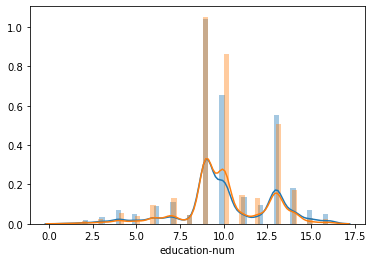

In [19]:
# Figure 1: male and females have a similar level of education in this dataset
sns.distplot(train["education-num"][train["sex"]==" Male"])
sns.distplot(train["education-num"][train["sex"]==" Female"])

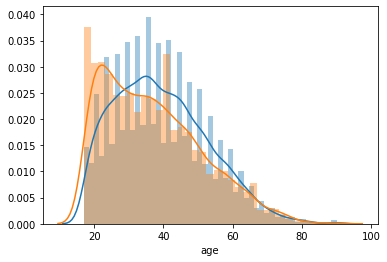

In [20]:
# Figure 2: females are younger than males in this dataset
sns.distplot(train["age"][train["sex"]==" Male"])
sns.distplot(train["age"][train["sex"]==" Female"])

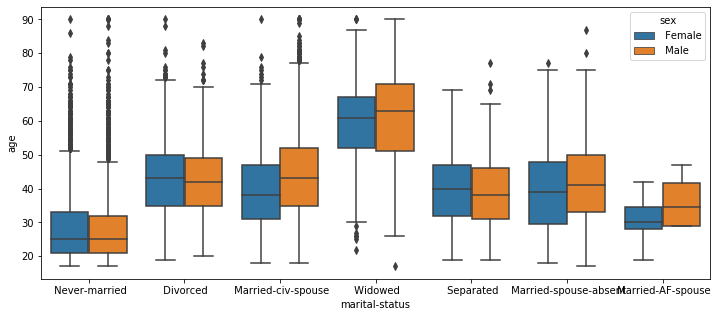

In [21]:
# Figure 3: married females are younger than married males
plt.figure(figsize=(12,5))
sns.boxplot(x="marital-status", y="age", hue="sex", data=train)

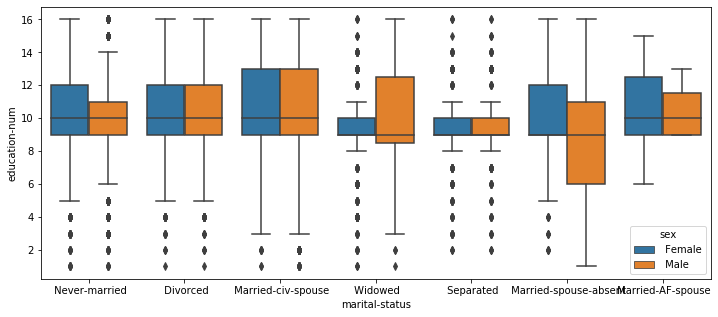

In [22]:
# Figure 4
plt.figure(figsize=(12,5))
sns.boxplot(x="marital-status", y="education-num", hue="sex", data=train)

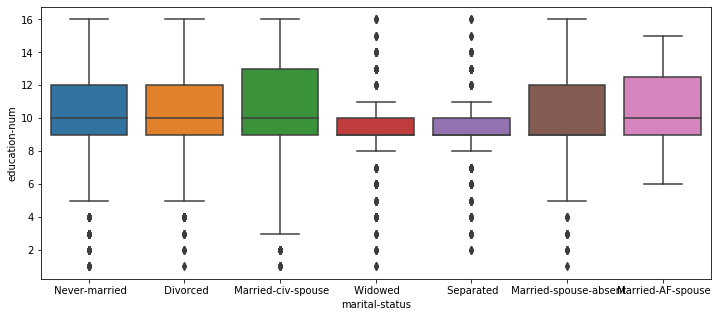

In [23]:
# Figure 5
plt.figure(figsize=(12,5))
sns.boxplot(x="marital-status", y="education-num", data=train)

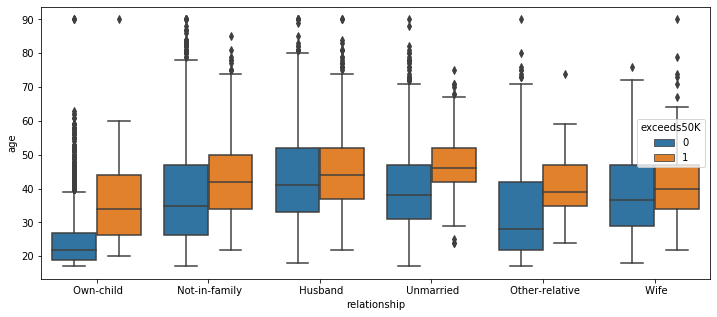

In [24]:
# Figure 6
plt.figure(figsize=(12,5))
sns.boxplot(x="relationship", y="age", hue="exceeds50K", data=train)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


([<matplotlib.axis.XTick at 0x1a1f8ec050>,
 <a list of 7 Text xticklabel objects>)

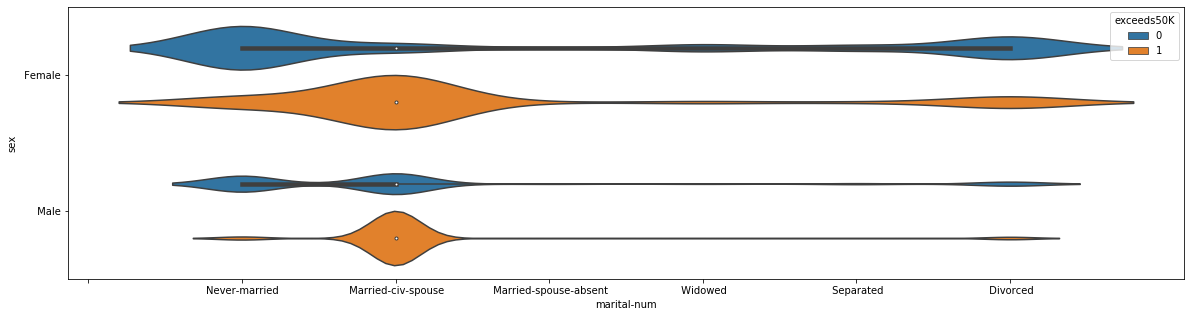

In [25]:
# Figure 7
train["marital-num"] = train["marital-status"]
new_countries = {
    1: [' Never-married'],
    2: [' Married-civ-spouse', ' Married-AF-spouse'],
    3: [' Married-spouse-absent'],
    4: [' Widowed'],
    5: [' Separated'],
    6: [' Divorced']
}

for k, v in new_countries.items():
    train['marital-num'] = train['marital-num'].replace(v, k)

plt.figure(figsize=(20,5))
sns.violinplot(y="sex", x="marital-num", hue="exceeds50K", data=train)
plt.xticks(np.arange(7), ['', 'Never-married',' Married-civ-spouse', ' Married-spouse-absent', ' Widowed', ' Separated',' Divorced']) 

<Figure size 864x360 with 0 Axes>

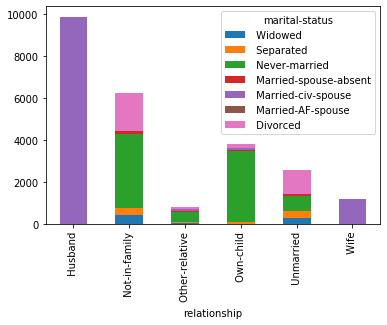

In [26]:
# Figure 8: personal situation
plt.figure(figsize=(12,5))
df_plot = train.groupby(['relationship', 'marital-status']).size().reset_index().pivot(columns='marital-status', index='relationship', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

<Figure size 864x360 with 0 Axes>

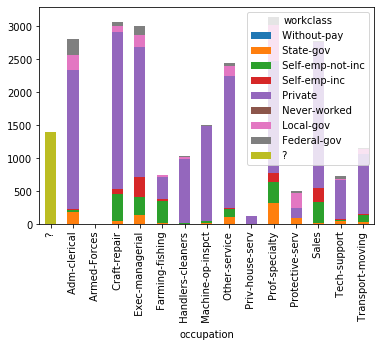

In [27]:
# Figure 9: jobs
plt.figure(figsize=(12,5))
df_plot = train.groupby(['occupation', 'workclass']).size().reset_index().pivot(columns='workclass', index='occupation', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True)

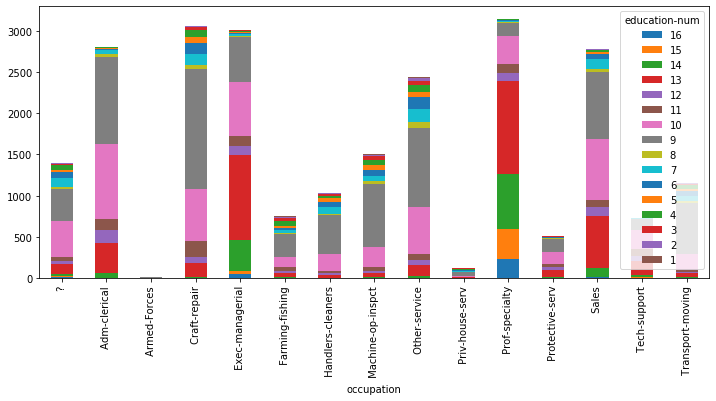

In [28]:
# Figure 10: jobs
df_plot = train.groupby(['occupation', 'education-num']).size().reset_index().pivot(index='occupation', columns='education-num', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True, figsize=(12,5))

# PART IV: Correlations

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
(24421, 13) (24421, 13)
corr train
(87, 87)
corr test
(87, 87)


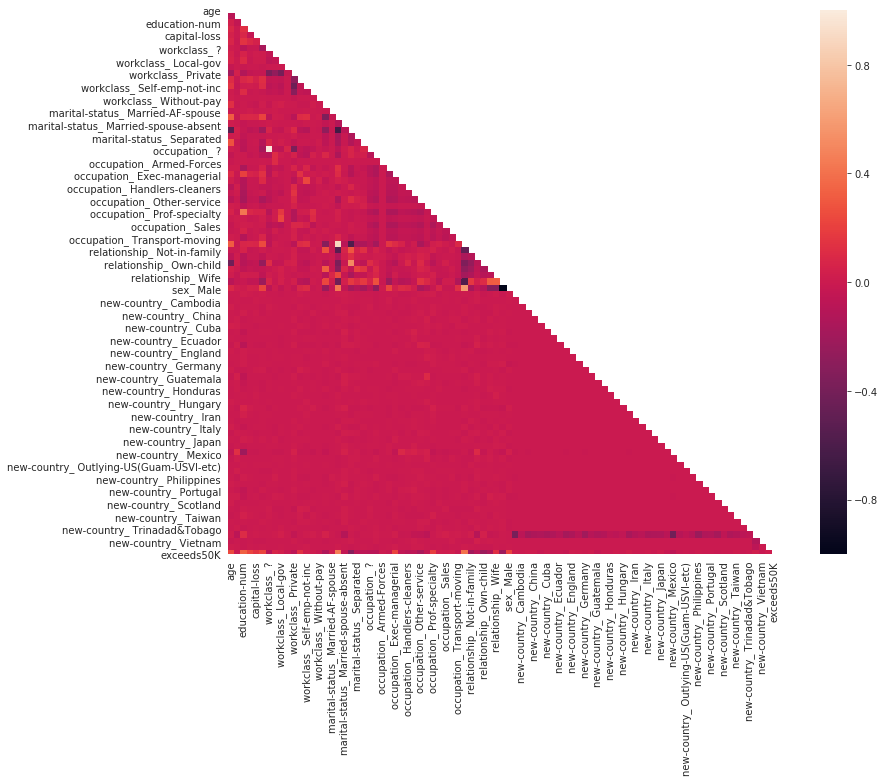

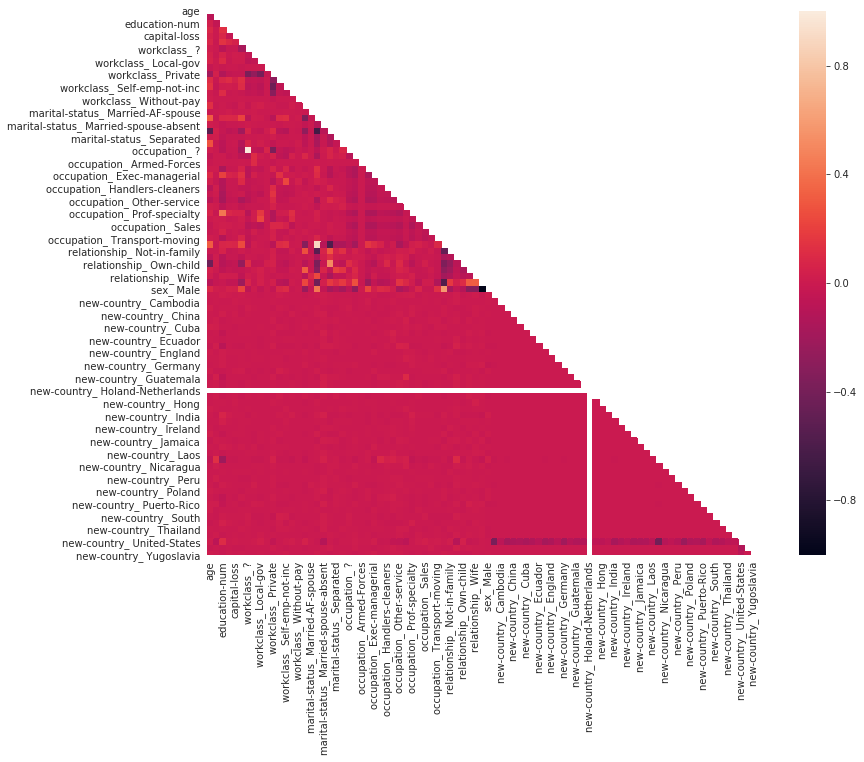

In [29]:
# standardize and plot correlation matrix train

# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))
print(list(X_train.columns))
print(X_train.shape, X_test.shape)

print("corr train")

X_test['new-country'] = X_test['native-country'].copy()
X_train['new-country'] = X_train['native-country'].copy()

for k, v in new_countries.items():
    X_train['new-country'] = X_train['new-country'].replace(v, k)
    X_test['new-country'] = X_test['new-country'].replace(v, k)
X_train = X_train.drop(["education", 'native-country'], axis=1)
X_test = X_test.drop(["education", 'native-country'], axis=1)


X_train_encoded = pd.concat([pd.get_dummies(X_train), y_train], axis=1)   # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize
X_train_encoded_norm = pd.DataFrame(X_train_encoded_norm, columns=X_train_encoded.columns)

corr = X_train_encoded_norm.corr()
print(corr.shape)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True)

print("corr test")
X_test_encoded = pd.get_dummies(X_test)   # one-hot-encoding
X_test_encoded_norm = StandardScaler().fit_transform(X_test_encoded)  # standadize
X_test_encoded_norm = pd.DataFrame(X_train_encoded_norm, columns=X_test_encoded.columns)

corr_test = X_test_encoded_norm.corr()
print(corr_test.shape)
mask_test = np.zeros_like(corr_test)
mask_test[np.triu_indices_from(mask_test)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr_test, mask=mask_test, vmin=-1, vmax=1, square=True)

In [30]:
# display the most correlated couples of features 
s = corr.unstack()
so = s.sort_values()
so = so[abs(so) != 1]
print(so.shape)
print(so.iloc[:12])
print(so.iloc[-10:])

(7482,)
sex_ Male                           sex_ Female                          -1.000000
sex_ Female                         sex_ Male                            -1.000000
marital-status_ Married-civ-spouse  marital-status_ Never-married        -0.651016
marital-status_ Never-married       marital-status_ Married-civ-spouse   -0.651016
                                    relationship_ Husband                -0.581092
relationship_ Husband               marital-status_ Never-married        -0.581092
sex_ Female                         relationship_ Husband                -0.578772
relationship_ Husband               sex_ Female                          -0.578772
marital-status_ Never-married       age                                  -0.539544
age                                 marital-status_ Never-married        -0.539544
relationship_ Not-in-family         marital-status_ Married-civ-spouse   -0.537174
marital-status_ Married-civ-spouse  relationship_ Not-in-family          -0.537

# PART V: Principal Component Analysis (PCA)

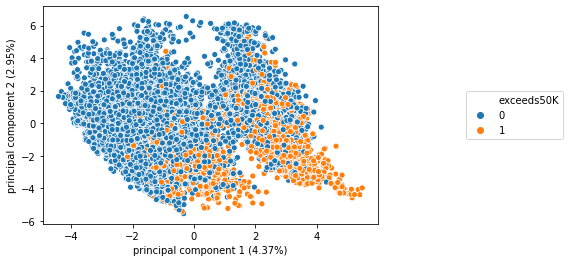

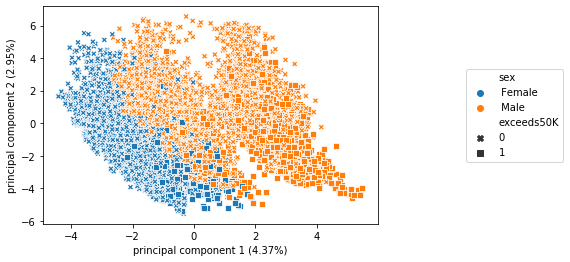

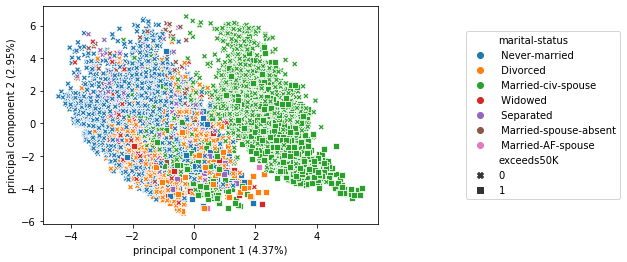

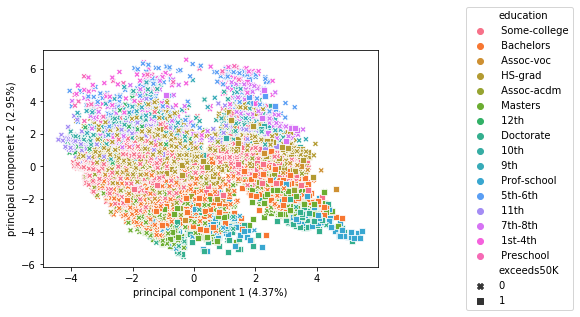

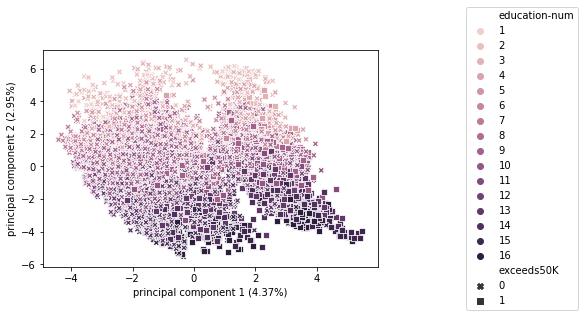

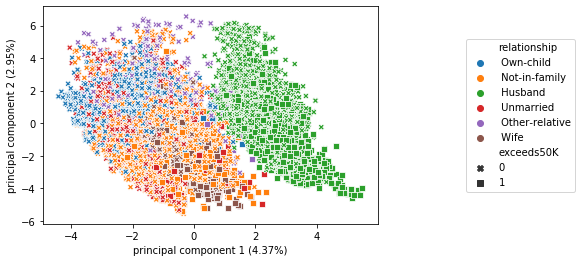

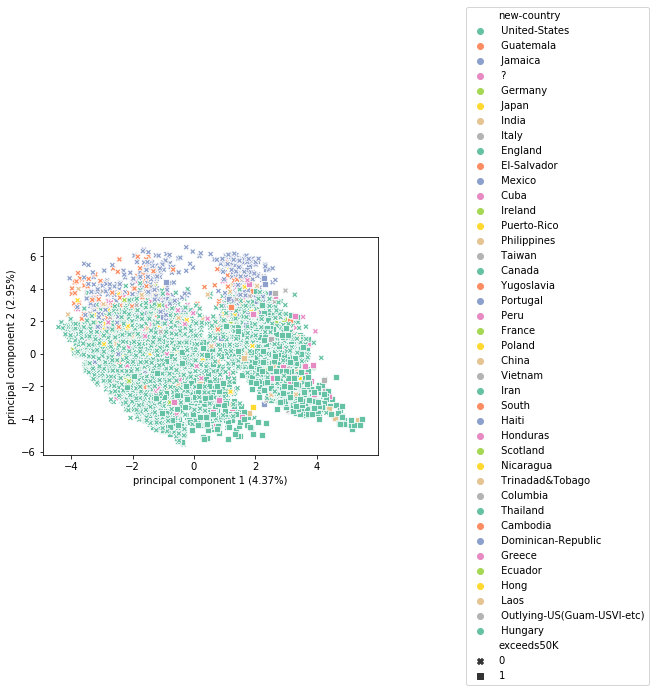

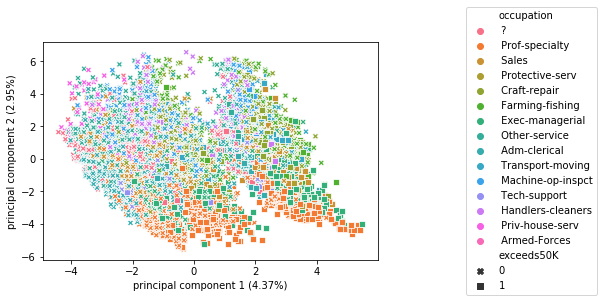

In [31]:
# PCA PC 1 and 2, fit and transform on train

# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]

X_train_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_encoded_norm)
principalComponents = pca.transform(X_train_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, train], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    hue="exceeds50K", data=finalDf, legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


X_train['new-country'] = X_train['native-country'].copy()

for k, v in new_countries.items():
    X_train['new-country'] = X_train['new-country'].replace(v, k)

finalDf = pd.concat([finalDf, X_train['new-country']], axis = 1)

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="new-country", data=finalDf,legend="full",
                   palette="Set2")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), style="exceeds50K", markers=markers, hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [32]:
def circleOfCorrelations(pc_infos, ebouli):
    a = 1
    plt.figure(figsize=(20,20))
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=a, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    x_list, y_list = (np.array(list(pc_infos["PC-0"])), np.array(list(pc_infos["PC-1"])))
    idx_list = list(pc_infos.index)
    r_list = np.sqrt(x_list**2+y_list**2)
    newidx_x = np.argwhere(abs(r_list) >= 0.2)
    newidx_y = np.argwhere(abs(r_list) >= 0.2)
    newidx = np.concatenate((newidx_x, newidx_y)) 
    r_list = np.take(r_list, newidx)
    x_list = np.take(x_list, newidx)
    y_list = np.take(y_list, newidx)
    idx_list = np.take(idx_list, newidx)
    r_list = np.sqrt(x_list**2+y_list**2)
    for i in range(len(idx_list)):
        x, y = x_list[i], y_list[i]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        pos = (x,y)
        plt.annotate(idx_list[i][0], xy=pos, fontsize=15)
        print(idx_list[i][0])
    plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-a,a))
    plt.ylim((-a,a))
    plt.axhline(y=0, color='k', ls='--')
    plt.axvline(x=0, c='k', ls='--')
    plt.title("Circle of Correlations")
    return newidx_x, newidx_y

def myPCA(df):
    # Normalize data
    df_norm = StandardScaler().fit_transform(df) #(df - df.mean()) / df.std()
    print(df_norm.shape)
    # PCA
    pca = PCA() #n_components='mle')
    pca_res = pca.fit_transform(df_norm) #pca.fit_transform(df_norm.values)
    # Ebouli
    ebouli = pd.Series(pca.explained_variance_ratio_)
    # print(len(ebouli))
    ebouli.plot(kind='bar', title="Scree plot", figsize=(20,5))
    plt.show()
    # Circle of correlations
    # http://stackoverflow.com/a/22996786/1565438
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df.columns)
    newidx_x, newidx_y = circleOfCorrelations(pc_infos, ebouli)
    plt.show()
    dat = pd.DataFrame(pca_res, columns=cols)
    plt.scatter(dat["PC-0"].values,dat["PC-1"].values)
    plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.title("PCA")
    plt.show()
    return pc_infos, ebouli, newidx_x, newidx_y, 

(24421, 102)


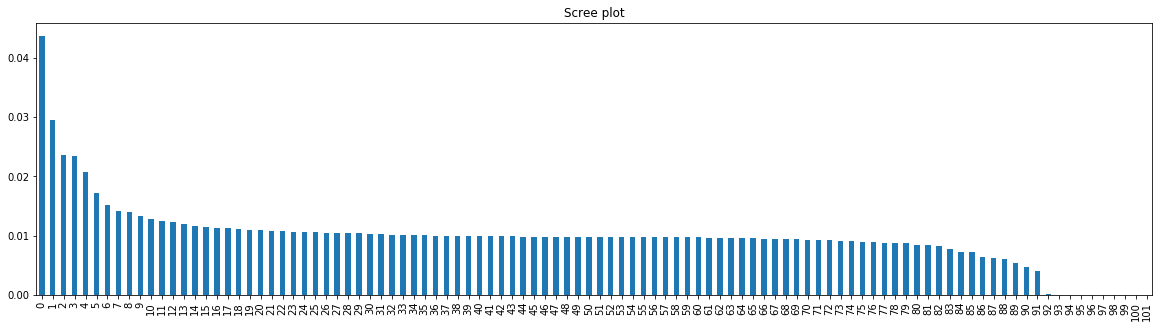

age
education-num
workclass_ Private
education_ Bachelors
education_ Masters
marital-status_ Married-civ-spouse
marital-status_ Never-married
occupation_ Prof-specialty
relationship_ Husband
relationship_ Not-in-family
relationship_ Own-child
sex_ Female
sex_ Male
age
education-num
workclass_ Private
education_ Bachelors
education_ Masters
marital-status_ Married-civ-spouse
marital-status_ Never-married
occupation_ Prof-specialty
relationship_ Husband
relationship_ Not-in-family
relationship_ Own-child
sex_ Female
sex_ Male


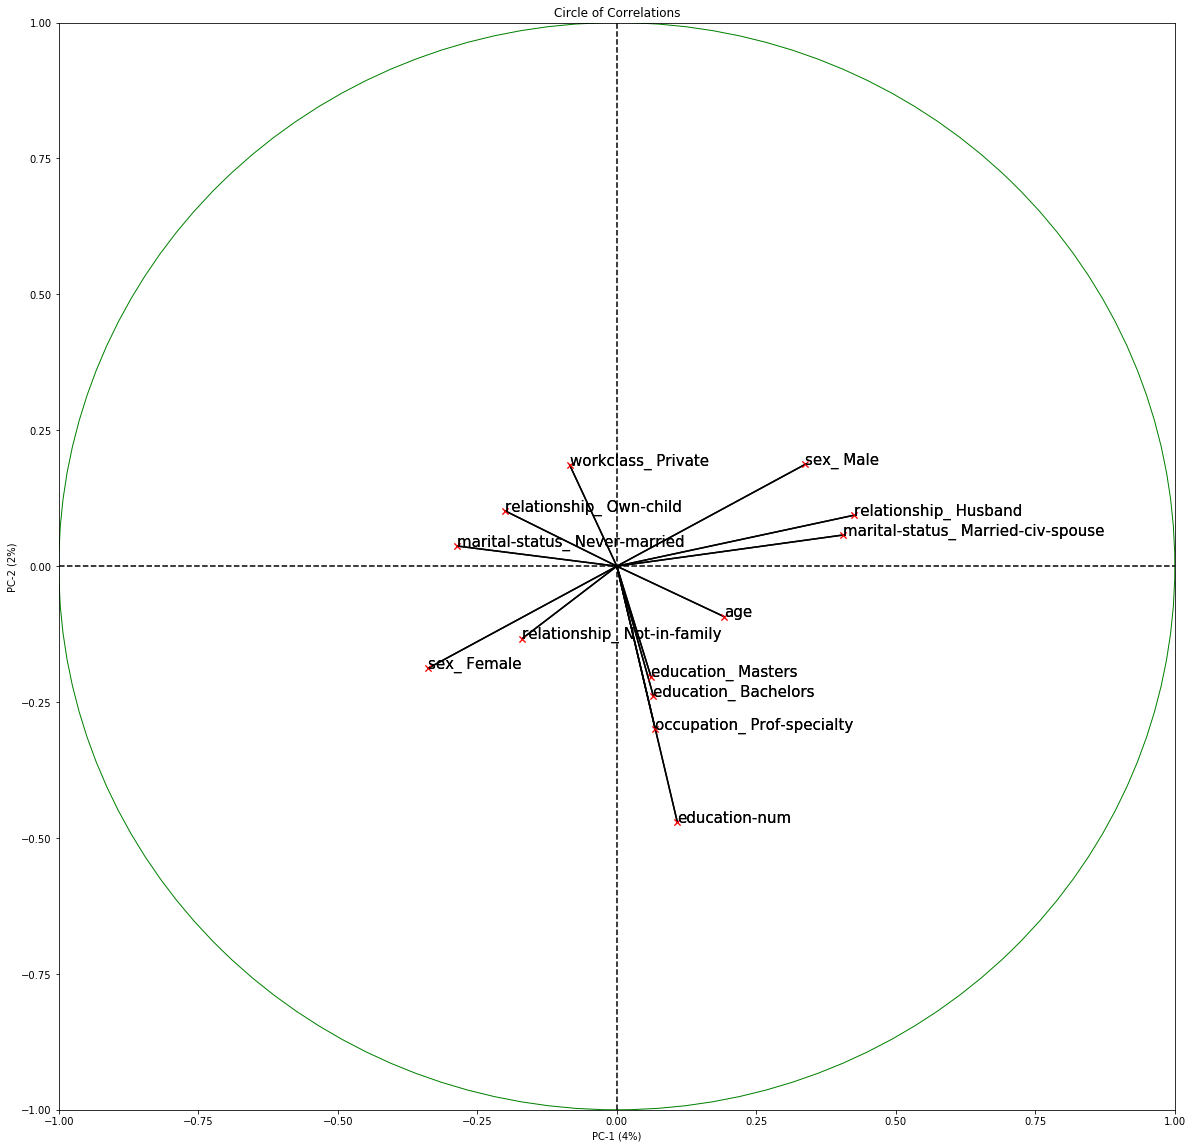

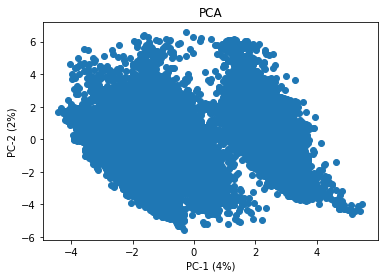

In [33]:
pc_infos, ebouli, newidx_x, newidx_y = myPCA(X_train_encoded)

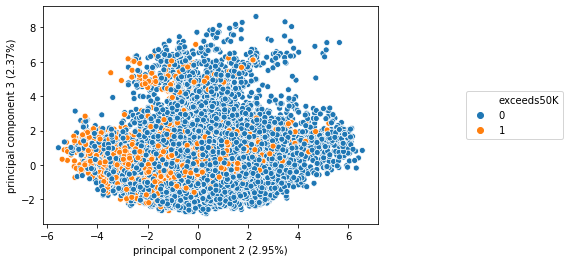

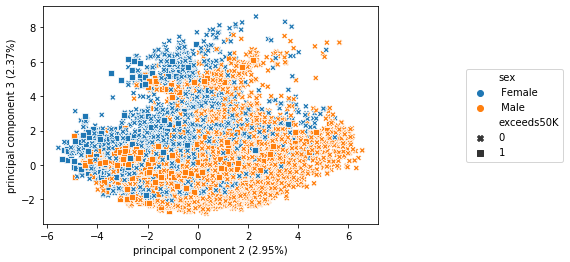

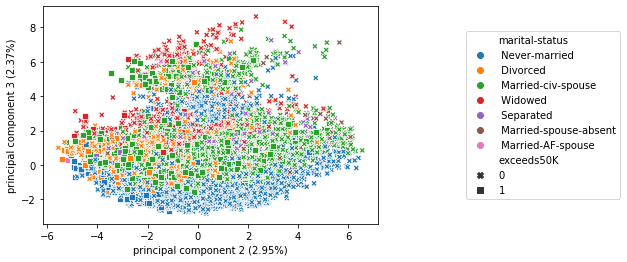

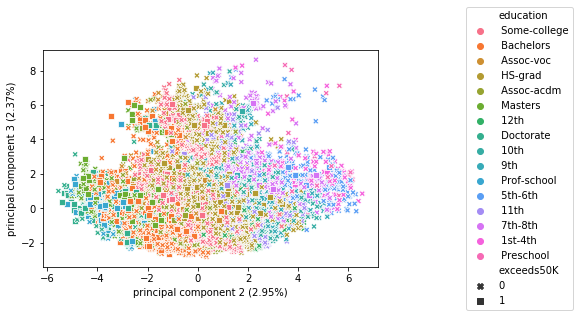

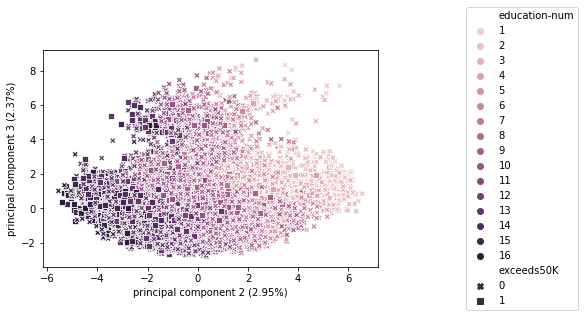

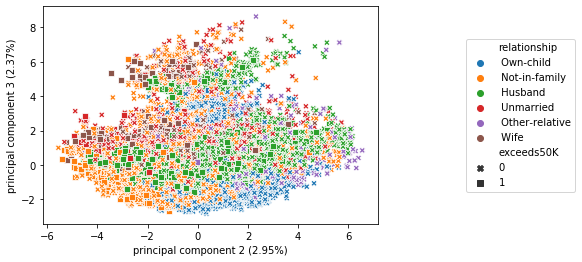

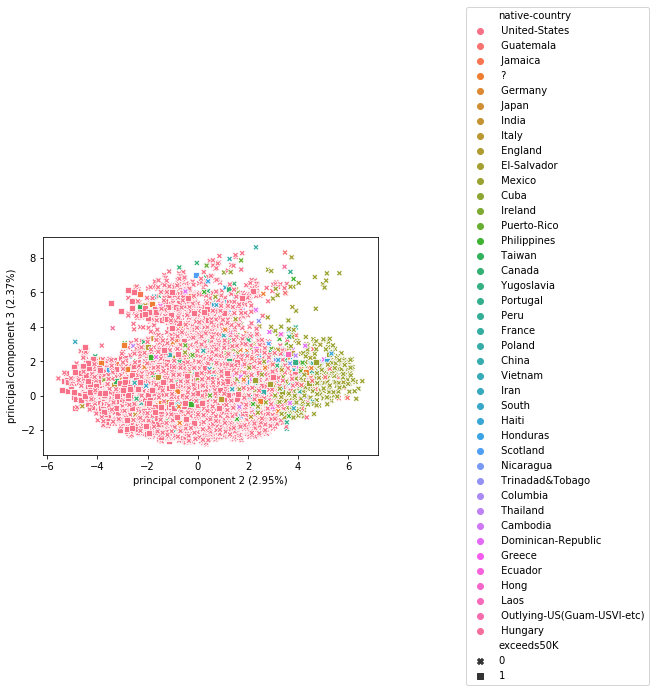

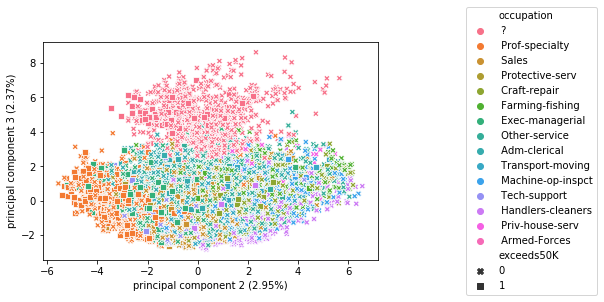

In [34]:
# PCA PC 2 and 3, fit and transform on train

# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]

X_train_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA

pca = PCA(n_components=3, random_state=0)
pca.fit(X_train_encoded_norm)
principalComponents = pca.transform(X_train_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                                                                  'principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100)])
finalDf = pd.concat([principalDf, train], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100),
                    hue="exceeds50K", data=finalDf, legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    y='principal component 3 ({:.2f}%)'.format(pca.explained_variance_ratio_[2]*100), style="exceeds50K", markers=markers, hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


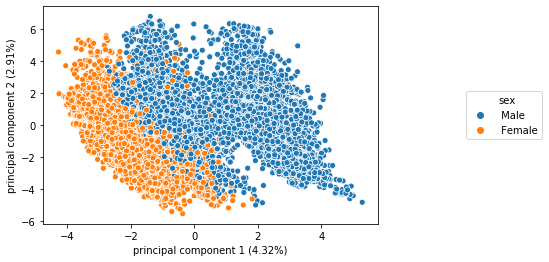

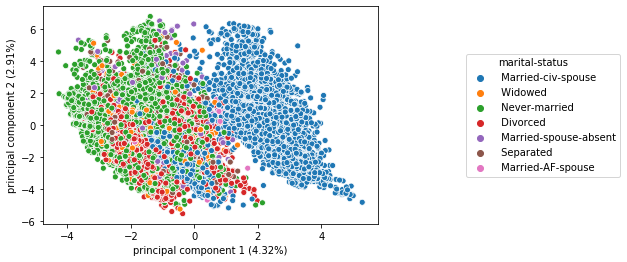

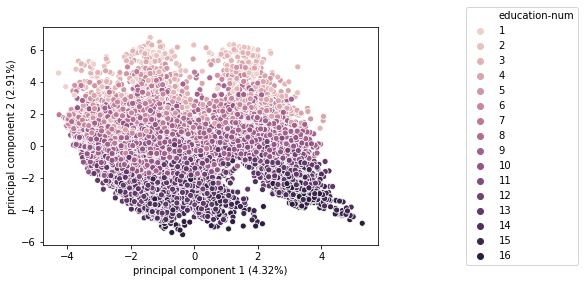

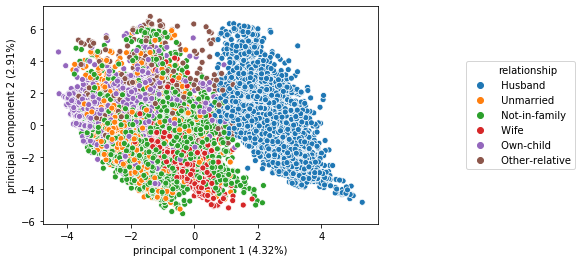

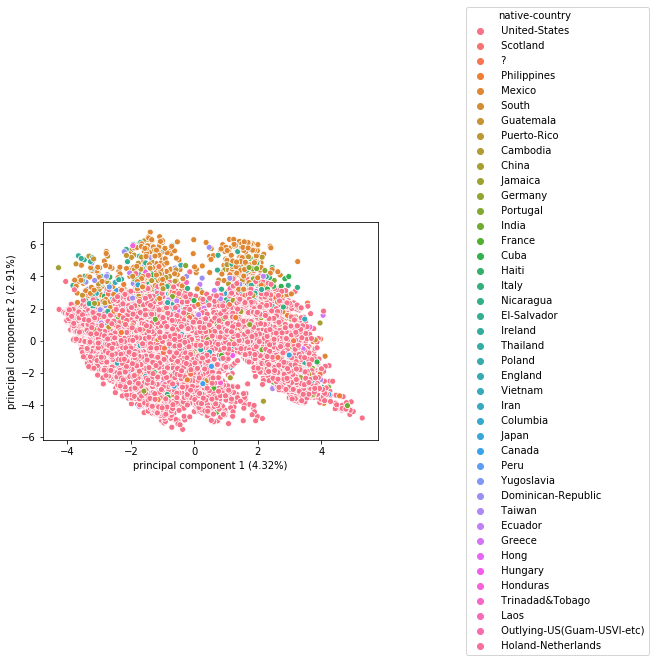

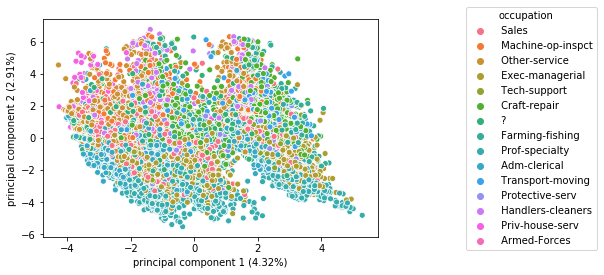

In [35]:
# PCA PC 1 and 2, fit and transform on test

# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))


X_test_encoded = pd.get_dummies(X_test)  # one-hot-encoding
X_test_encoded_norm = StandardScaler().fit_transform(X_test_encoded)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_test_encoded_norm)
principalComponents = pca.transform(X_test_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, X_test], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)



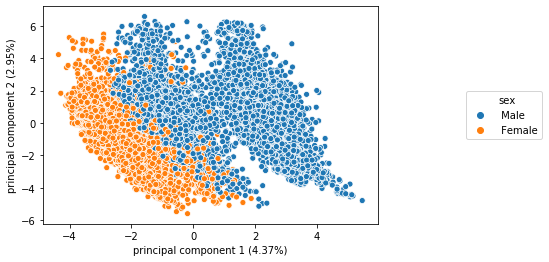

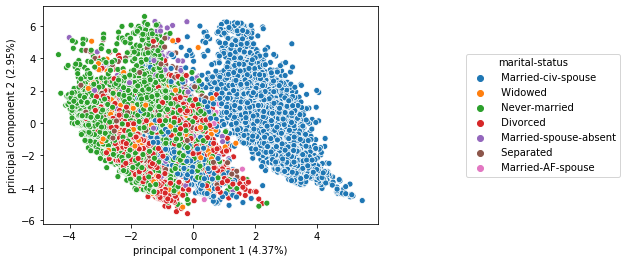

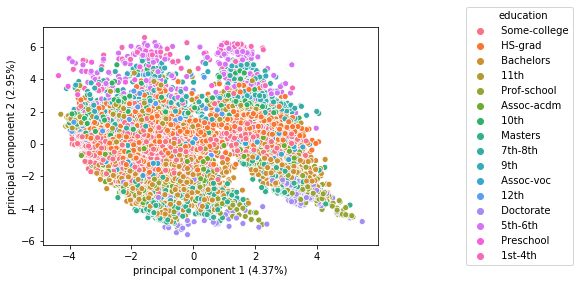

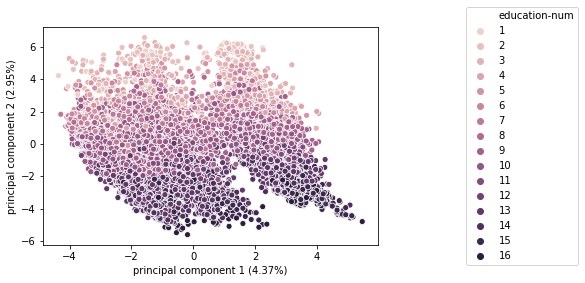

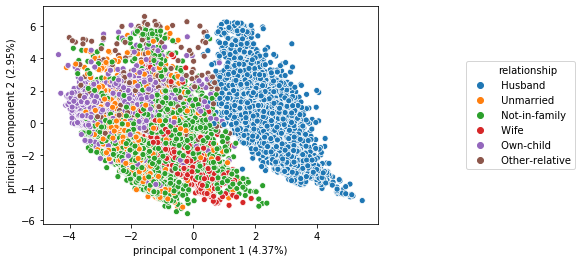

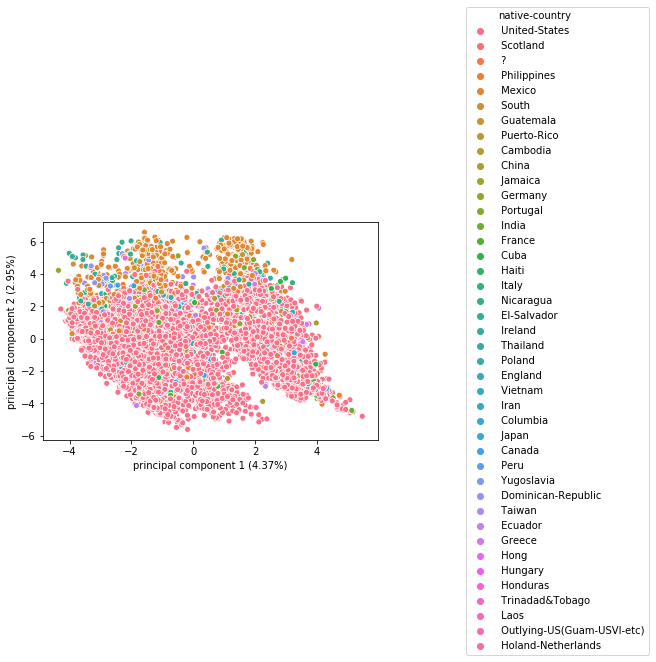

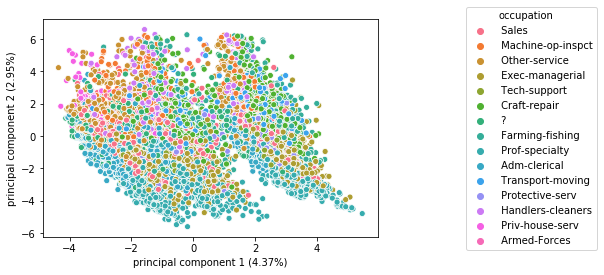

In [36]:
# project test in PCA-space comp 1 and 2 fitted on train

train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

X_train_encoded = pd.get_dummies(X_train)  # one-hot-encoding
X_train_encoded_norm = StandardScaler().fit_transform(X_train_encoded)  # standadize before PCA
X_test_encoded = pd.get_dummies(X_test)  # one-hot-encoding
col_test = list(X_test_encoded.columns)
col_train = list(X_train_encoded.columns)
for c in col_train:
    if c not in col_test:
        X_test_encoded[c] = np.nan
for c in col_test:
    if c not in col_train:
        X_test_encoded = X_test_encoded.drop(c, axis=1)
X_test_encoded = X_test_encoded[list(X_train_encoded.columns)]
X_test_encoded_norm = StandardScaler().fit_transform(X_test_encoded.fillna(0))  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_encoded_norm)
principalComponents = pca.transform(X_test_encoded_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, X_test], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="sex", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="marital-status", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),  hue="education-num", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),hue="relationship", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="native-country", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100), hue="occupation", data=finalDf,legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

